In [1]:
import os
import sys
import json
import itertools
from scipy import signal
import numpy
import matplotlib.pyplot as pyplot

In [2]:
heatFluxDict = json.load(open("PoolBoiling-HeatFlux.json") )
velDict = json.load(open("FlowBoiling-Velocity.json"))

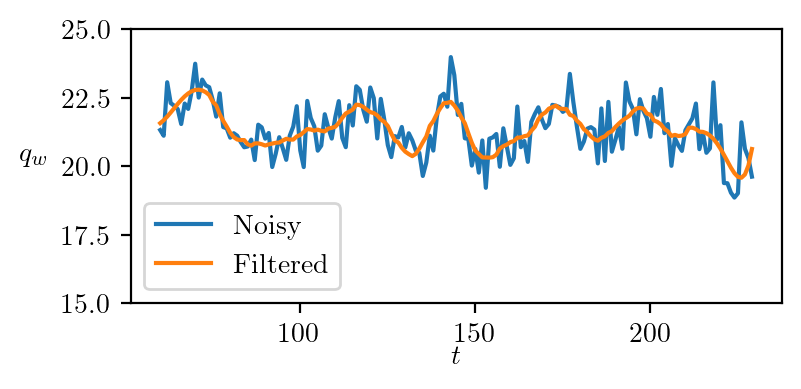

In [3]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
figure =  pyplot.figure(figsize=(4,2), dpi=200)

meanflux=numpy.zeros_like(numpy.array(heatFluxDict["Buffer = 4.0"]["time"]))
meanflux[:] = numpy.mean(numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"]))

pyplot.plot(
    numpy.array(heatFluxDict["Buffer = 4.0"]["time"]),
    numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"]),
    #signal.savgol_filter(numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"]), 10, 2),
    linestyle='-'
)

pyplot.plot(
    numpy.array(heatFluxDict["Buffer = 4.0"]["time"]),
    #numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"]),
    signal.savgol_filter(numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"]), 30, 5),
    linestyle='-'
)

#pyplot.plot(
#    numpy.array(heatFluxDict["Buffer = 4.0"]["time"]),
#    meanflux,
#    #signal.savgol_filter(numpy.array(heatFluxDict["Buffer = 4.0"]["qliq"]), 101, 3),
#    linestyle='-.', color='k',
#)
pyplot.ylim([15,25])
pyplot.ylabel(r"${q}_w$", rotation=0, labelpad=10)
pyplot.xlabel(r"$t$", labelpad=-1)
pyplot.legend(["Noisy","Filtered"])
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/hf.png")

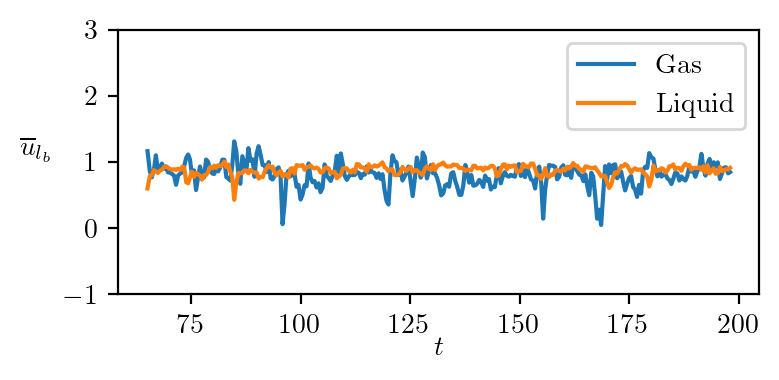

In [4]:
pyplot.rc("font", family="serif", size=10, weight="bold")
pyplot.rc("axes", labelweight="bold", titleweight="bold")
pyplot.rc("text", usetex=True)
figure =  pyplot.figure(figsize=(4,2), dpi=200)

pyplot.plot(velDict["time"], velDict["gas"],)
pyplot.plot(velDict["time"], velDict["liq"], linestyle='-')

pyplot.ylim([-1,3])
pyplot.ylabel(r"$\overline{u}_{l_b}$", rotation=0, labelpad=10)
pyplot.xlabel(r"$t$", labelpad=-1)
pyplot.legend(["Gas","Liquid"])
pyplot.tight_layout()
pyplot.savefig("/Users/Akash/Desktop/growth.png")